In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV


# generate two class dataset
data = pd.read_csv("train-41.csv")
data.head()

In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,No,IS,Sex,Age,NeuP,NeuC,MonP,MonC,BasP,BasC,...,UA,Cr,TP,CG,TBil,DBil,IBil,AKP,GGT,RAST-ALT
0,339511,1,1,54,77.21,9.64,5.1,0.64,0.2,3,...,137,60.1,60.8,28.7,6.5,2.9,3.6,56,12,4.00
1,341581,1,0,70,87.50,6.82,2.9,0.23,0.1,1,...,240,62.9,60.7,22.0,26.3,9.9,16.4,74,12,1.38
2,7387,0,1,58,64.10,3.72,4.8,0.28,0.2,1,...,213,53.2,74.8,31.9,17.9,4.2,13.7,123,68,0.69
3,301715,1,1,80,59.50,3.52,4.1,0.24,0.3,2,...,486,108.9,64.6,26.0,11.6,6.2,5.4,88,23,1.80
4,11403,0,1,66,59.60,3.03,2.0,0.10,0.3,2,...,337,75.2,65.7,23.4,19.1,6.3,12.8,59,22,2.00


In [2]:
data=data.drop(['No'],axis=1)
# Split target and features
X = data.drop(['IS'],axis=1)
X
y = data['IS']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)


(8380, 41)
(8380,)


In [3]:
X_train=X_train.astype(float)

In [12]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [15]:
# Create the RFE object and compute a cross-validated score.
svc = RandomForestClassifier(random_state=25)
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='roc_auc',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features defined by auc: %d" % rfecv.n_features_)


rfecv2 = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv2.fit(X, y)

print("Optimal number of features defined by accuracy : %d" % rfecv2.n_features_)

Optimal number of features defined by auc: 41
Optimal number of features defined by accuracy : 29


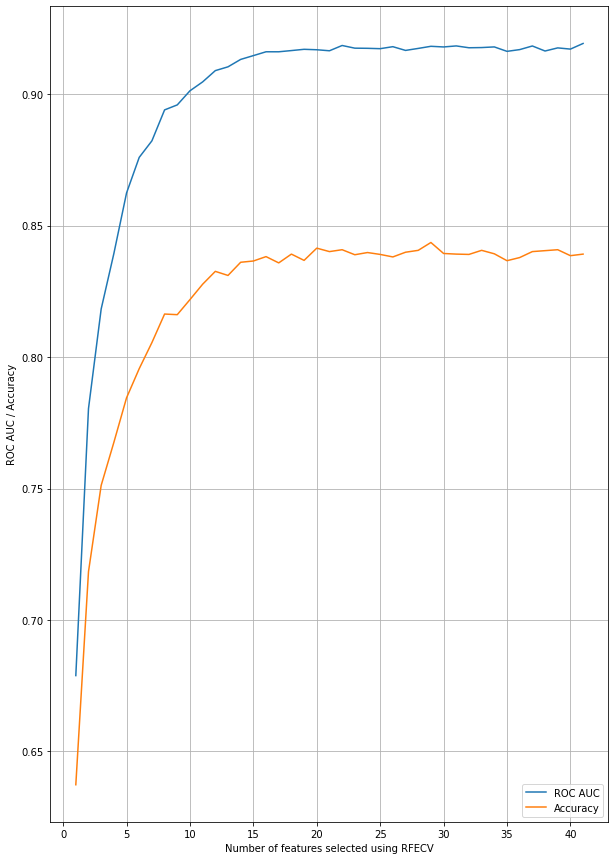

In [22]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected using RFECV")
plt.ylabel("ROC AUC / Accuracy")



plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_, label = 'ROC AUC')


plt.plot(range(min_features_to_select,
               len(rfecv2.grid_scores_) + min_features_to_select),
         rfecv2.grid_scores_, label = 'Accuracy')


plt.legend(loc='lower right')
plt.grid(True)

plt.show()

In [20]:
cols = list(X.columns)
rfecv2acc = pd.Series(rfecv2.support_, index = cols)
selected_features = rfecv2acc[rfecv2acc==True].index
print(selected_features)

Index(['Age', 'NeuP', 'NeuC', 'MonP', 'MonC', 'EosP', 'LymP', 'LymC', 'MCHC',
       'MCH', 'RBC', 'RDW-CV', 'MCV', 'PLT', 'PCT', 'Hgb', 'Glu', 'TC', 'TG',
       'LDL-C', 'HDL-C', 'Alb', 'BUN', 'UA', 'Cr', 'TP', 'CG', 'AKP',
       'RAST-ALT'],
      dtype='object')


In [ ]:
## 2  Filter Method (Pearson Correlation)

In [ ]:
"""Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the 
output variable Cardia_adverse= cardiaovascular adverse events. We will only select features which has correlation of 
above 0.5 (taking absolute value) with the 
output variable.
"""

In [ ]:
"""The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation"""

In [4]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

C:\Users\93513\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\93513\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


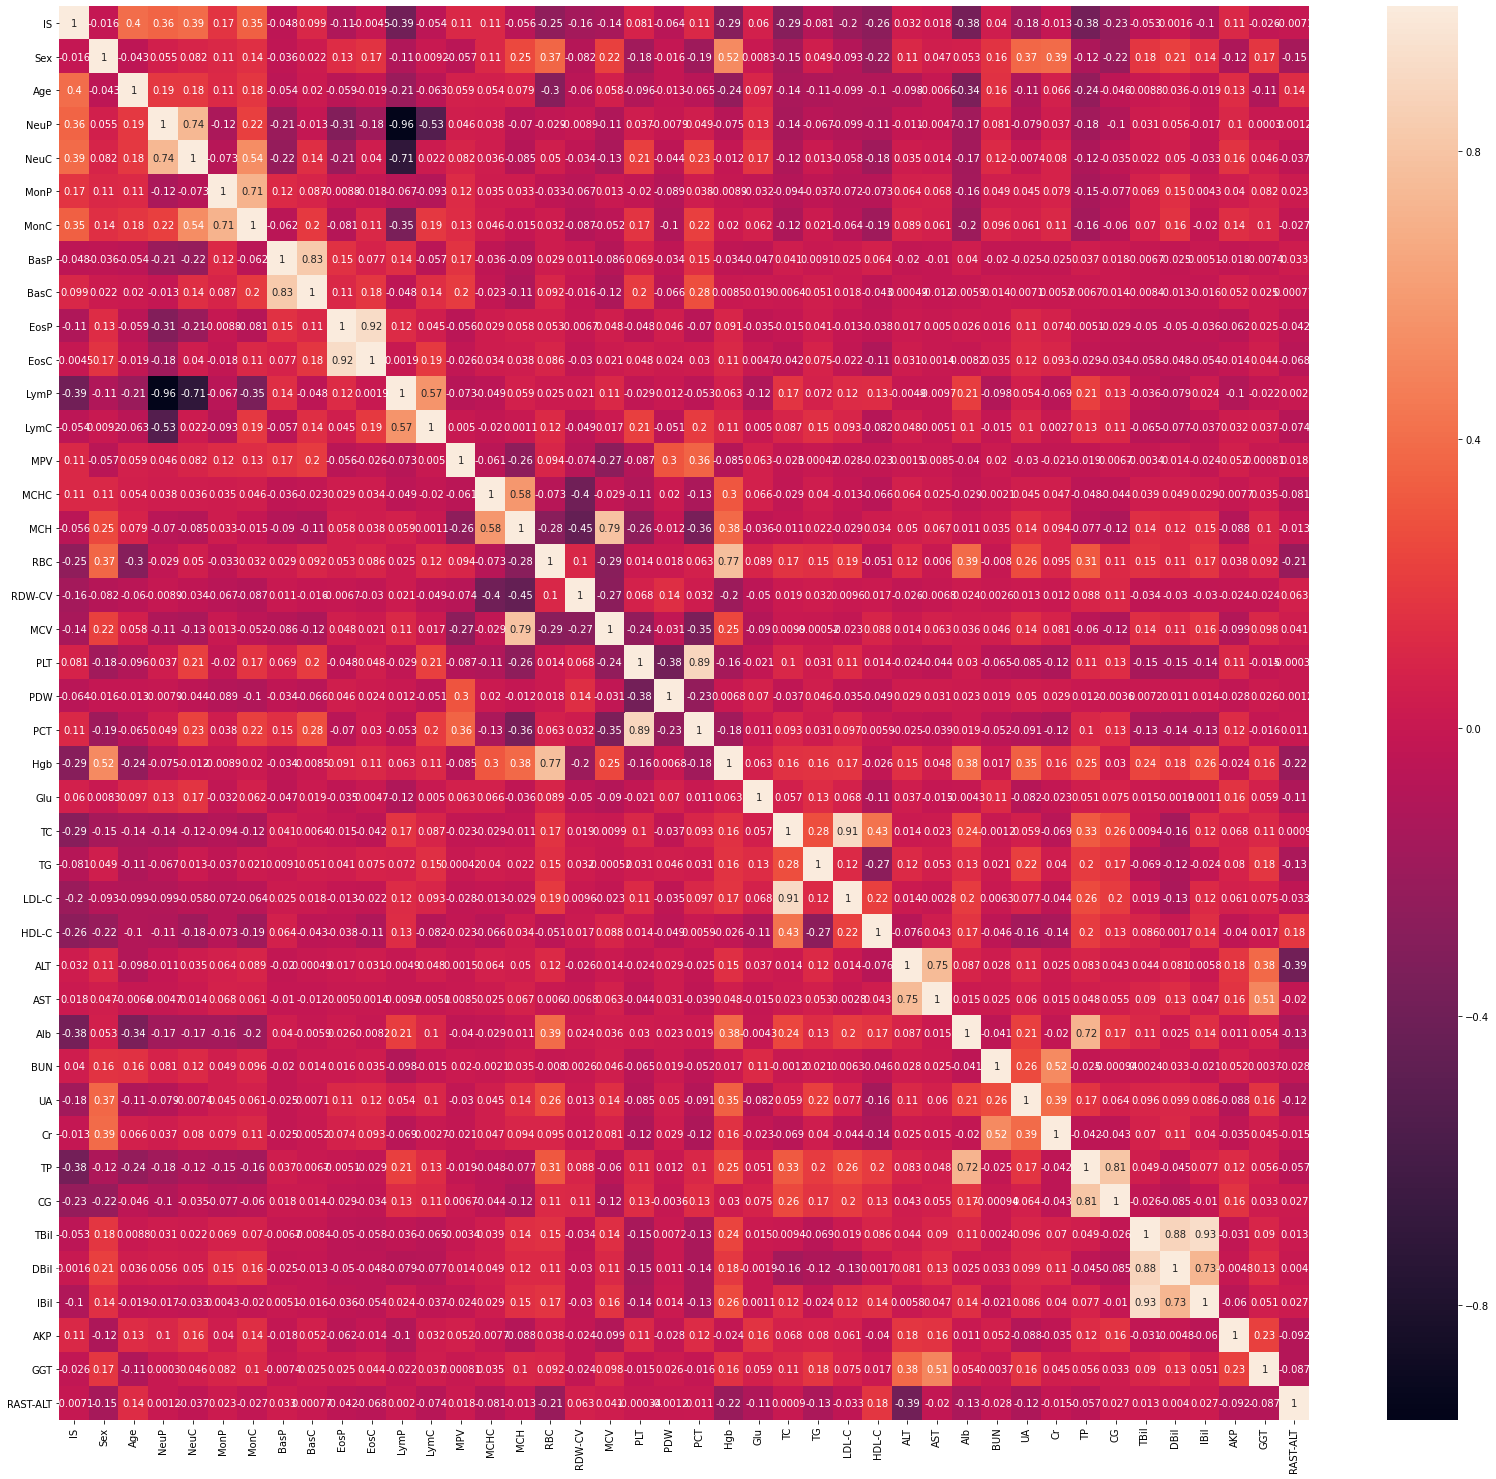

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(28,26))
cor = data.corr(method = "pearson")
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["IS"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

IS        1.000000
Age       0.401579
NeuP      0.358192
NeuC      0.390160
MonP      0.171056
MonC      0.349294
EosP      0.112976
LymP      0.385146
MPV       0.105176
MCHC      0.108046
RBC       0.254258
RDW-CV    0.158435
MCV       0.143578
PCT       0.110701
Hgb       0.286752
TC        0.287799
LDL-C     0.201812
HDL-C     0.263710
Alb       0.375540
UA        0.176461
TP        0.384570
CG        0.226333
IBil      0.104164
AKP       0.110591
Name: IS, dtype: float64

In [ ]:
## 3 - Embedded method (LASSO)

In [7]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.007489
Best score using built-in LassoCV: 0.462033


In [8]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 27 variables and eliminated the other 14 variables


Text(0.5, 1.0, 'Feature importance using LASSO Model')

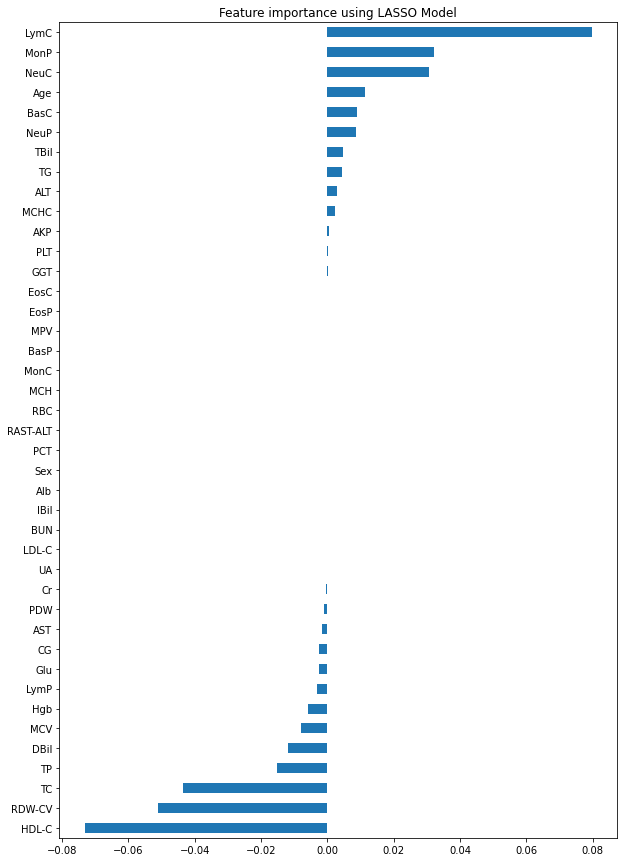

In [9]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using LASSO Model")

In [10]:
print (imp_coef != 0)

HDL-C        True
RDW-CV       True
TC           True
TP           True
DBil         True
MCV          True
Hgb          True
LymP         True
Glu          True
CG           True
AST          True
PDW          True
Cr           True
UA           True
LDL-C       False
BUN         False
IBil        False
Alb         False
Sex         False
PCT         False
RAST-ALT    False
RBC         False
MCH         False
MonC        False
BasP        False
MPV         False
EosP        False
EosC        False
GGT          True
PLT          True
AKP          True
MCHC         True
ALT          True
TG           True
TBil         True
NeuP         True
BasC         True
Age          True
NeuC         True
MonP         True
LymC         True
dtype: bool
